# Plotting time-series with different variables 

When working with time-series data, there are situations where two variables are recorded over the same time span but measure entirely different things. To analyze their relationship, it is often helpful to visualize them together on the same plot.

At first, both variables can be added to a single set of axes. However, when the two measurements use different scales, one variable may appear compressed or flattened, making the comparison difficult. To address this, a better approach is to plot them using twin axes. With this method, the two variables share the same x-axis (time), but each variable has its own y-axis scale. One axis appears on the left and the other on the right, allowing both variables to be properly represented.

To make the visualization more intuitive, colors can be used to differentiate the variables. Each line can be given a distinct color, and the corresponding y-axis label can be styled in the same color to show which axis belongs to which variable. This visual encoding helps reduce confusion and improves readability.

Clarity can be further enhanced by also coloring the tick marks and tick labels on the y-axes. By ensuring the labels and ticks match the line colors, the viewer can easily follow which scale corresponds to which variable. This creates a consistent and effective pattern for presenting multiple time-series on one plot.

Since this type of plotting often requires repeating the same steps, it can be useful to wrap the process into a reusable function. A function can take in the axes, the data to plot, the colors, and the axis labels, and then automatically apply plotting, labeling, and styling. This not only saves time but also keeps the code clean and easy to maintain.

Finally, once such a function is defined, it can be reused whenever needed, avoiding redundancy and ensuring consistent, clear visualizations across different datasets.

# Prepare Date

In [2]:
# Import pandas library
import pandas as pd

# Read the CSV file and set up a DateTime index
climate_change = pd.read_csv(
    "datasets/climate_change.csv",
    parse_dates=["date"],
    index_col="date"
)

## Exercise: Plotting two variables

When two variables are recorded over the same time period, they can be displayed together on a single subplot. However, if these variables have very different ranges, plotting them on the same axis may not make sense. To fix this, we can create a second y-axis using the `twinx()` method. This allows the variables to share the same x-axis (time) but have independent y-axes for proper scaling.

In this task, you’ll use the `climate_change` DataFrame, which has a DateTimeIndex and contains two variables: one for atmospheric CO₂ levels (`"co2"`) and another for relative temperature (`"relative_temp"`).

### Instructions

* Create a Figure and Axes with `plt.subplots()`.
* Plot the CO₂ values in blue on the first Axes.
* Create a second Axes that shares the x-axis using `twinx()`.
* Plot the relative temperature values in red on the second Axes.

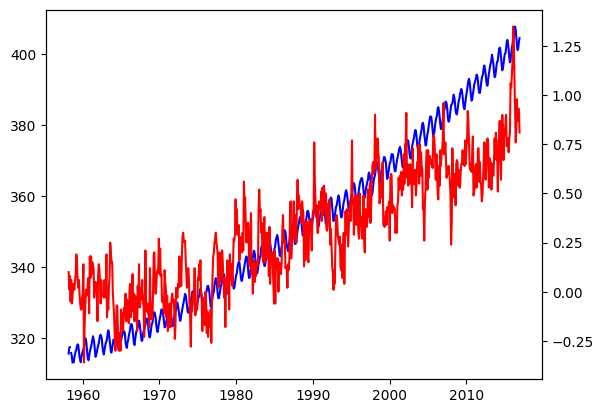

In [3]:
import matplotlib.pyplot as plt

# Set up the figure and base axis
fig, base_ax = plt.subplots()

# Plot CO2 data in blue on the first axis
base_ax.plot(climate_change.index, climate_change["co2"], color="blue")

# Generate a twin axis that shares the x-axis
temp_ax = base_ax.twinx()

# Plot relative temperature in red on the twin axis
temp_ax.plot(climate_change.index, climate_change["relative_temp"], color="red")

# Display the final visualization
plt.show()

## Exercise: Defining a function that plots time-series data

When you notice that a block of code is being reused multiple times, it’s more efficient to wrap it in a function rather than copy-pasting it. This makes your code cleaner, easier to maintain, and reusable in different contexts.

In this task, you will build a function that takes an Axes object, a time variable, another variable to plot, a chosen color, and axis labels. The function should draw the line, set the axis labels, and format the y-axis with the correct color for both the label and tick marks.

### Instructions

* Define a function named `plot_timeseries` with parameters: an Axes object (`axes`), `x`, `y`, a `color` string, and labels for both axes (`xlabel`, `ylabel`).
* Plot the data (`y` against `x`) using the specified color.
* Assign the x- and y-axis labels, ensuring the y-axis label color matches the input color.
* Adjust the y-axis tick marks and labels using `tick_params` so they use the same color.

In [4]:
# Define the reusable function for plotting time-series
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    # Draw the line plot with the given color
    axes.plot(x, y, color=color)

    # Label the x-axis
    axes.set_xlabel(xlabel)

    # Label the y-axis and set its color
    axes.set_ylabel(ylabel, color=color)

    # Match y-axis ticks and labels with the chosen color
    axes.tick_params(axis='y', colors=color)

## Exercise: Using a plotting function

Creating functions helps us avoid repeating the same code multiple times — a principle often summarized as *“Don’t repeat yourself”*.

In the previous step, you wrote a function called `plot_timeseries` that takes an Axes object, data for the x- and y-axis, a color, and labels for the axes. This function is already available for you to use in this exercise.

You’ll now apply it to visualize the `climate_change` dataset, which has a DateTimeIndex for the measurement dates, along with two columns: `co2` (carbon dioxide levels) and `relative_temp` (temperature changes).

### Instructions

* Use `plot_timeseries` with the provided `ax` object to plot the `co2` column in blue. Label the x-axis `"Time (years)"` and the y-axis `"CO2 levels"`.
* Create a twin Axes object with `ax.twinx()` so both variables share the same time scale.
* Use `plot_timeseries` on the twin Axes to plot the `relative_temp` column in red, with labels `"Time (years)"` and `"Relative temperature (Celsius)"`.

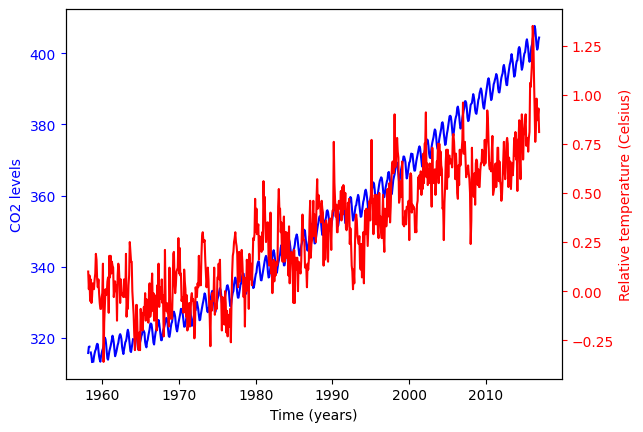

In [5]:
# Create the figure and base Axes
fig, ax = plt.subplots()

# Plot CO2 levels in blue
plot_timeseries(ax, climate_change.index, climate_change["co2"], 
                "blue", "Time (years)", "CO2 levels")

# Add a twin Axes sharing the x-axis
ax2 = ax.twinx()

# Plot relative temperature in red
plot_timeseries(ax2, climate_change.index, climate_change["relative_temp"], 
                "red", "Time (years)", "Relative temperature (Celsius)")

# Display the plot
plt.show()